# **``Dimensionality Reduction Techniques``**

---

## 1. [SVD](#SVD-(Singular_Value_Decomposition))
- #### [Using Numpy](#Using--Numpy)
    - #### [Re-construct main dataset](#Re-construct)

## 2. [Truncated SVD](#Truncated_SVD)
- #### [Using Sklearn](#Using--Sklearn)
    - #### [Re-construct main dataset](#Re-construct(TSVD))
    
## 3. [SVDS](#SVDS)
- #### [Using Scipy](#Using--Scipy)
    - #### [Re-construct main dataset](#Re-construct(SVDS))
    
## 4. [Matrix Free Solvers](#Matrix-Free--Solver)
- #### [Sparse Matrix & Pandas DF performance comparison](#Execution_time_diff)

## 5. [SVD on Breast Cancer Dataset](#SVD_on_Breast_Cancer_Datset)
- #### [Lets run some models](#Models_Performance)
    - #### [Perceptron](#Perceptron)
    - #### [Logistic Regression](#Logistic_Regression)
    - #### [K-Nearest Neighbors](#KNN)

In [1]:
import os
import sys
import logging

logging.basicConfig(filename="SA1_PCA.log",
                    filemode='w',
                    level=logging.INFO,
                    format="%(asctime)s : %(levelname)s : %(message)s")

try :
    logging.info("#### Packages import ####")
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sklearn
    from sklearn import datasets
    import scipy
except ImportError as ie:
    # Output expected ImportErrors
    logging.error(msg=ie.__class__.__name__  + " :: Missing Package --> " + ie.name)
except Exception as exception:
    # Output unexpected Exceptions
    logging.info("#### Exceptions other than ModuleImportError ####")
    logging.log(msg=(exception, False))
    logging.log(msg=exception.__class__.__name__ + " :: " + exception.name)

%matplotlib inline

# **``SVD-(Singular_Value_Decomposition)``**

#### **Lets first understand how SVD works using a dummy dataset, then we will apply the same concept on Breast Cancer Dataset. There are multiple ways by which we can apply SVD on our dataset. First, I'll demonstrate the same using Numpy then via Sklearn.**

## **``Using--Numpy``**

In [2]:
X = pd.DataFrame({'col1':[9,4,7,4],
                  'col2':[3,2,1,2]})

In [3]:
X

,col1,col2
0,9,3
1,4,2
2,7,1
3,4,2


In [4]:
X.shape, X.ndim

((4, 2), 2)

In [5]:
from numpy.linalg import svd

In [6]:
U,S,VT = svd(X,full_matrices=True,compute_uv=True,hermitian=False)

In [7]:
pd.DataFrame(U)

,0,1,2,3
0,-0.711633,-0.113179,-0.642945,-0.259597
1,-0.331229,-0.466058,0.650505,-0.499920
2,-0.523597,0.743485,0.385767,0.155758
3,-0.331229,-0.466058,0.121029,0.811436


In [13]:
Sigma = np.zeros((X.shape[0],X.shape[1]))
Sigma

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [14]:
Sigma[:X.shape[1],:X.shape[1]] = np.diag(S)
Sigma

array([[13.32885697,  0.        ],
       [ 0.        ,  1.53021959],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [15]:
pd.DataFrame(VT)

,0,1
0,-0.954298,-0.298856
1,0.298856,-0.954298


## **``Re-construct``**
### **``How to re-construct the main dataset from U, Sigma and VT?``**

#### **Way-1 : Using Dot Product**

In [13]:
np.dot(U,np.dot(Sigma,VT))

array([[9., 3.],
       [4., 2.],
       [7., 1.],
       [4., 2.]])

#### **Way-2 : Using Matrix Multiplication**

In [14]:
U @ Sigma @ VT

array([[9., 3.],
       [4., 2.],
       [7., 1.],
       [4., 2.]])

# **`Truncated_SVD`**
#### **Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.**

#### **In particular, truncated SVD works on term count/tf-idf matrices as returned by the vectorizers in :mod:`sklearn.feature_extraction.text`. In that context, it is known as `latent semantic analysis (LSA)`.**

#### **This estimator supports two algorithms: a fast randomized SVD solver, and a "naive" algorithm that uses ARPACK as an eigensolver on `X * X.T` or `X.T * X`, whichever is more efficient.**

## **``Using--Sklearn``**

In [15]:
from sklearn.decomposition import TruncatedSVD

In [16]:
tsvd = TruncatedSVD(n_components=2)

In [17]:
X2 = pd.DataFrame({'col1':[9,4,7,4],
                   'col2':[3,2,1,2],
                   'col3':[5,6,7,1]})

In [18]:
X2.shape, X2.ndim

((4, 3), 2)

In [19]:
X_transf = tsvd.fit_transform(X2)

#### **Variance of every component**

In [20]:
vect_magnitude = tsvd.explained_variance_                 ## The magnitude or amount of variance in every component
vect_magnitude

array([6.42468871, 3.2616684 ])

##### **``Here, explained_variance_ represents the variance of both the components.``**

In [21]:
np.var(X_transf[:,0]), np.var(X_transf[:,1])

(6.4246887130369394, 3.2616683951751866)

#### **Percentage of variations explained by components**

In [22]:
expln_var_ratio = tsvd.explained_variance_ratio_           ## Percentage of variation explained by each component
expln_var_ratio

array([0.63064429, 0.32016377])

##### **``Here, explained_variance_ratio is the ratio of the variances in the components and the sum of the variance in the original dataset.``**

In [23]:
np.var(X_transf,axis=0)/np.sum(np.var(X2,axis=0))

array([0.63064429, 0.32016377])

#### **Total percentage of variations explained by components**

In [24]:
tot_var_expln = np.sum((expln_var_ratio))*100              ## Total variation explained by both the components 
print('Total variation explained by the components is {0:.3f}%'.format(tot_var_expln))

Total variation explained by the components is 95.081%


##### **``It is just the addition of components individual percentage of variances.``**

In [25]:
np.sum(np.var(X_transf,axis=0)/np.sum(np.var(X2,axis=0)))

0.9508080597018038

#### **Number of components**

In [26]:
tsvd.n_components            ## Number of generated components            

2

#### **VT**

In [27]:
VT_x2 = tsvd.components_     ## These are the values of VT's i.e. the EIGEN VECTORS
VT_x2

array([[ 0.75687368,  0.23209938,  0.61095999],
       [ 0.53103415,  0.32653333, -0.7819071 ]])

### **So, one thing to understand here is that the above VT_x2 is representing the two eigen vectors whose amount of variation or magnitude(means the eigen value) is represented by singular_values_.**

In [28]:
tsvd.singular_values_        ## These are the values of the sigma's i.e. the EIGEN VALUES

array([16.60761964,  3.62068869])

In [29]:
U_Sigma_x2 = X_transf        ## The fit_transform function returns us the product of U and Sigma's
U_Sigma_x2

array([[10.56296122,  1.84937181],
       [ 7.15745341, -1.91423937],
       [ 9.80693507, -1.42957735],
       [ 4.10265348,  1.99529615]])

### **Here, one point to understand is that SVD is nothing but breaking the higher rank dataset into one set(U,Singma and VT) of Rank-1 matrices or closest approximation of main dataset is achieved by the addition of more than one set(U,Sigma and VT) of Rank-1 matrices which can yield a higher rank dataset.**

### **Fit_transform returns the product of U and Sigma, so if we want to reconstruct our main dataset then we just need to peform its matrix multiplication with the VT's or components_.**

## **``Re-construct(TSVD)``**
### **``How to re-construct the main dataset from U, Sigma and VT?``**

#### **Way-1 : Using Matrix Multiplication**

In [30]:
retrv_x2 = pd.DataFrame(U_Sigma_x2 @ VT_x2).apply(lambda val : np.round(val,4))
retrv_x2

,0,1,2
0,8.9769,3.0555,5.0075
1,4.4008,1.0362,5.8697
2,6.6635,1.8094,7.1094
3,4.1648,1.6038,0.9464


#### **Way-2 : Using Dot Product**

In [31]:
pd.DataFrame(np.dot(U_Sigma_x2, VT_x2)).apply(lambda val : np.round(val,4))

,0,1,2
0,8.9769,3.0555,5.0075
1,4.4008,1.0362,5.8697
2,6.6635,1.8094,7.1094
3,4.1648,1.6038,0.9464


### **We have reterieved X2 that was our dataset of shape (4,3) with 12 elements and it is the closest approximate with two components having 8 elements.**

### **Here, it might feels like we have saved a very little space but imagine if we have 1000 x 1000 dataset then in such as case we will only consume space of 2000 elements instead of 10,00,000.**

In [30]:
X2

,col1,col2,col3
0,9,3,5
1,4,2,6
2,7,1,7
3,4,2,1


# **`SVDS`**
#### **It is SVD for sparse matirces. It computes the largest or smallest k singular values/vectors for a sparse matrix. The order of the singular values is not guaranteed. It can use the following Eigen Value solvers:**

- ##### **``ARPACK(Stands for ARNoldi Package)``**

- ##### **``LOBPCG(Stand for Locally Optimal Block Preconditioned Conjugate Gradient)``**

## **``Using--Scipy``**

In [41]:
X3 = pd.DataFrame({'col1':[9,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   'col2':[0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
                   'col3':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,1],
                   'col4':[0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9]})

In [46]:
X3.shape

(23, 4)

In [42]:
from scipy.sparse.linalg import svds

In [60]:
U_svds_x3, Sigma_svds_x3, VT_svds_x3 = svds(A=X3,k=2,solver='lobpcg')

In [61]:
U_svds_x3

array([[0.        , 0.91381155],
       [0.        , 0.        ],
       [0.30945484, 0.        ],
       [0.        , 0.40613847],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.10223039, 0.        ],
       [0.        , 0.        ],
       [0.9454029 , 0.        ]])

In [63]:
pd.DataFrame(U_svds_x3).shape

(23, 2)

In [64]:
Sigma_svds_x3

array([9.56486299, 9.8488578 ])

In [65]:
pd.DataFrame(VT_svds_x3)

,0,1,2,3
0,0.0,0.0,0.16297,0.986631
1,1.0,0.0,0.00000,0.000000


In [66]:
VT_svds_x3.shape

(2, 4)

## **``Re-construct(SVDS)``**
### **``How to re-construct the main dataset from U, Sigma and VT?``**
### **``Matrix Multiplication``**

In [90]:
sigma_val_svds_X3 = np.zeros((X3.shape[1]-2,X3.shape[1]-2))
sigma_val_svds_X3

array([[0., 0.],
       [0., 0.]])

In [91]:
sigma_val_svds_X3[:,:] = np.diag(Sigma_svds_x3)
sigma_val_svds_X3

array([[9.56486299, 0.        ],
       [0.        , 9.8488578 ]])

In [92]:
pd.DataFrame(U_svds_x3 @ sigma_val_svds_X3 @ VT_svds_x3)

,0,1,2,3
0,9.0,0.0,0.000000,0.000000
1,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.482374,2.920322
3,4.0,0.0,0.000000,0.000000
4,0.0,0.0,0.000000,0.000000
5,0.0,0.0,0.000000,0.000000
6,0.0,0.0,0.000000,0.000000
7,0.0,0.0,0.000000,0.000000
8,0.0,0.0,0.000000,0.000000
9,0.0,0.0,0.000000,0.000000


In [84]:
X3

,col1,col2,col3,col4
0,9,0,0,0
1,0,2,0,0
2,0,0,0,3
3,4,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


### **``Numpy(SVD)_on_Sparse_Matrix``**

In [102]:
svd_x3 = np.linalg.svd(X3)

In [103]:
U_svd_x3, Sigma_svd_x3, VT_svd_x3 = svd_x3

In [104]:
pd.DataFrame(U_svd_x3)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.913812,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.191509,0.000000,0.358152
1,0.000000,0.000000,0.000000,-0.894427,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.447214,0.000000
2,0.000000,-0.309455,-0.082041,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.835434,0.000000,-0.446718
3,-0.406138,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.430895,0.000000,-0.805842
4,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [97]:
Sigma_svd_x3

array([9.8488578 , 9.56486299, 5.95931171, 2.23606798])

In [98]:
VT_svd_x3

array([[-1.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.16296995, -0.98663103],
       [-0.        , -0.        ,  0.98663103, -0.16296995],
       [-0.        , -1.        , -0.        , -0.        ]])

In [105]:
sigma_val_svd_x3 = np.zeros((X3.shape[0],X3.shape[1]))
sigma_val_svd_x3[:4,:] = np.diag(Sigma_svd_x3)
sigma_val_svd_x3

array([[9.8488578 , 0.        , 0.        , 0.        ],
       [0.        , 9.56486299, 0.        , 0.        ],
       [0.        , 0.        , 5.95931171, 0.        ],
       [0.        , 0.        , 0.        , 2.23606798],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        ,

In [106]:
pd.DataFrame(U_svd_x3 @ (sigma_val_svd_x3 @ VT_svd_x3)).apply(lambda val : np.round(val,2))

,0,1,2,3
0,9.0,0.0,0.0,0.0
1,0.0,2.0,0.0,0.0
2,0.0,0.0,-0.0,3.0
3,4.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


In [107]:
X3

,col1,col2,col3,col4
0,9,0,0,0
1,0,2,0,0
2,0,0,0,3
3,4,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


## **``Matrix-Free--Solver``**
### **``Scipy SVDS``**

In [151]:
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix

In [109]:
X_sp_mat = sparse_random(2000, 2000, density=0.01, format='csr',random_state=42)

In [110]:
X_sp_mat.shape

(2000, 2000)

In [111]:
X_sp_mat.ndim

2

In [149]:
## Memory space required for storing the data of Sparse Matrix 
## *****(We are here talking about the data of Sparse matrix not the spase object itself)*****
print(X_sp_mat.data.nbytes, X_sp_mat.indptr.nbytes, X_sp_mat.indices.nbytes)

print("\nTotal number of bytes required to store the data of above sparse matrix is {}".format(X_sp_mat.data.nbytes \
                                                                                       + X_sp_mat.indptr.nbytes \
                                                                                       + X_sp_mat.indices.nbytes))

320000 8004 160000

Total number of bytes required to store the data of above sparse matrix is 488004


In [131]:
## Size of whole object(size of stored data + overhead)
print("Size of Sparse Matrix object(size of stored data + overhead) is {} bytes".format(sys.getsizeof(X_sp_mat)))

Size of Sparse Matrix object(size of stored data + overhead) is 56 bytes


#### **Constructing Pandas DataFrame from Sparse Matrix**

In [119]:
X_sp_mat_df = pd.DataFrame.sparse.from_spmatrix(X_sp_mat)
X_sp_mat_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
X_sp_mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 2000 entries, 0 to 1999
dtypes: Sparse[float64, 0](2000)
memory usage: 468.9 KB


In [146]:
## Size of whole object(size of stored data + overhead)
print("Size of Pandas Df formed from the Sparse Matrix(size of stored data + overhead) is {} bytes".format(sys.getsizeof(X_sp_mat_df)))

Size of Pandas Df formed from the Sparse Matrix(size of stored data + overhead) is 480152 bytes


In [48]:
X_sp_matrix.ndim

2

In [49]:
X_sp_matrix.shape

(2000, 2000)

#### **Re-Constructing Sparse Matrix from Pandas DataFrame**

In [125]:
X_sp_mat_recons = scipy.sparse.csr_matrix(X_sp_mat_df)

In [126]:
X_sp_mat_recons.data.nbytes + X_sp_mat_recons.indptr.nbytes + X_sp_mat_recons.indices.nbytes

488004

In [147]:
## Size of whole object(size of stored data + overhead)
print("Size of re-constructed Sparse Matrix (size of stored data + overhead) is {} bytes".format(sys.getsizeof(X_sp_mat_recons)))

Size of re-constructed Sparse Matrix (size of stored data + overhead) is 56 bytes


### **Here, we found that Sparse objects requires less storage space or memory, however, if we store the same data in the pandas dataframe object then its storage becomes inefficient in terms of space consumption.**

### **``Execution_time_diff``**
#### **Difference in execution time of SVDS on Sparse Matrix and Pandas DataFrame** 

In [152]:
%timeit scipy.sparse.linalg.svds(X_sp_mat,k=200)

4.35 s ± 550 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [154]:
%timeit scipy.sparse.linalg.svds(X_sp_mat_df,k=200)

9.32 s ± 377 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### **For 200 largest singular values, time consumption with the dataframe object is more than double as compared to the Sparse object.**

# **``SVD_on_Breast_Cancer_Datset``**

In [155]:
breast_cancer = datasets.load_breast_cancer()

In [156]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [157]:
cancer_df = pd.concat([pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names),
                       pd.DataFrame(breast_cancer.target,columns=['Label'])],axis=1)

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [158]:
cancer_df.shape

(569, 31)

In [159]:
cancer_df.ndim

2

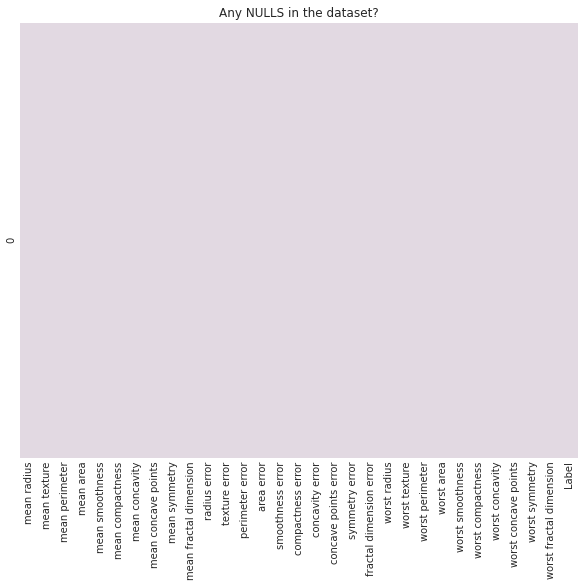

In [204]:
with plt.style.context('seaborn-dark'):
    plt.figure(figsize=(10,8))
    sns.heatmap(data=pd.DataFrame(cancer_df.isna().sum()).T,annot=False,cmap='twilight',cbar=False)
    plt.title("Any NULLS in the dataset?")

In [176]:
X_cancer_df = cancer_df.iloc[:,0:-1]

In [177]:
X_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [174]:
from sklearn.decomposition import TruncatedSVD

In [175]:
tsvd_cancer_data = TruncatedSVD(n_components=4)

In [178]:
cancer_transf = tsvd_cancer_data.fit_transform(X_cancer_df)

In [189]:
pd.DataFrame(tsvd_cancer_data.components_)  ### Eigen Vectors

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.010742,0.013405,0.070451,0.572522,0.000065,0.000080,0.000081,0.000045,0.000122,0.000041,...,0.012711,0.017879,0.084407,0.810937,0.000090,0.000196,0.000226,0.000096,0.000198,0.000056
1,-0.031086,-0.048312,-0.197365,-0.770224,-0.000262,-0.000175,-0.000041,-0.000017,-0.000498,-0.000184,...,-0.024143,-0.057909,-0.154088,0.576354,-0.000322,-0.000265,-0.000147,-0.000079,-0.000704,-0.000209
2,-0.076244,-0.177050,-0.473078,0.248295,-0.000901,-0.000651,0.000087,0.000065,-0.001707,-0.000650,...,-0.089261,-0.254771,-0.564344,-0.091523,-0.001352,-0.002279,-0.001684,-0.000567,-0.003024,-0.000911
3,0.046589,0.139147,0.300983,-0.120163,0.000809,0.000767,0.000420,0.000056,0.001547,0.000577,...,0.052641,0.171722,0.352475,-0.028998,0.001020,0.001204,0.000693,0.000147,0.002004,0.000688


In [190]:
tsvd_cancer_data.singular_values_  ### Eigen Values

array([30786.44462784,  2480.44578339,   880.46294478,   555.12328791])

In [184]:
tsvd_cancer_data.explained_variance_

array([439557.66669002,   9783.78914599,   1186.68181281,    524.75476533])

In [185]:
tsvd_cancer_data.explained_variance_ratio_

array([0.97440781, 0.02168862, 0.00263063, 0.00116327])

In [192]:
cancer_transf = pd.DataFrame(cancer_transf,columns=['PC1','PC2','PC3','PC4'])
cancer_transf = pd.concat([cancer_transf,cancer_df['Label']],axis=1)
cancer_transf.head()

,PC1,PC2,PC3,PC4,Label
0,2241.974276,347.715560,-27.537419,59.801498,0
1,2372.408403,56.901670,23.863162,-48.564064,0
2,2101.840280,11.947627,30.411386,-12.071248,0
3,697.432105,-2.127700,-46.793073,27.242121,0
4,2047.087229,-137.765113,67.523948,-20.172432,0


In [193]:
cancer_transf.shape

(569, 5)

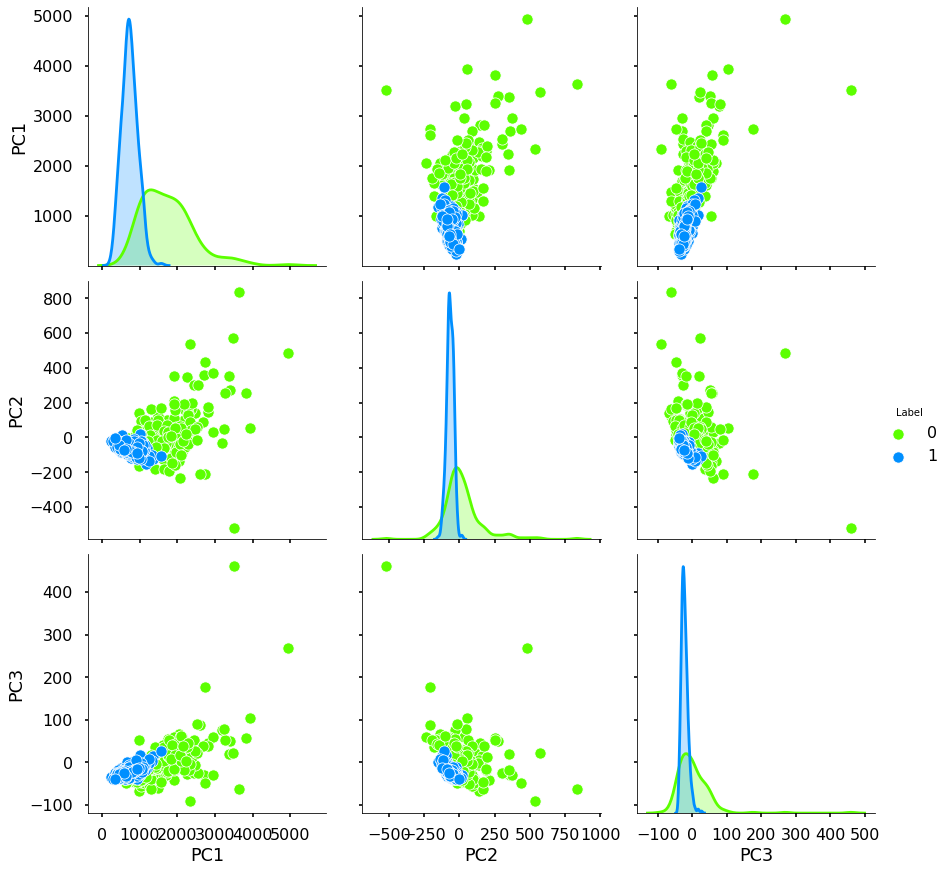

In [203]:
with plt.style.context('seaborn-poster'):
    sns.pairplot(data=cancer_transf[['PC1','PC2','PC3','Label']],hue='Label',height=4,aspect=1,palette='gist_rainbow');

### **First impression gave me the look of overlapping of data values and for further analysis I'll go ahead with the first two components.**

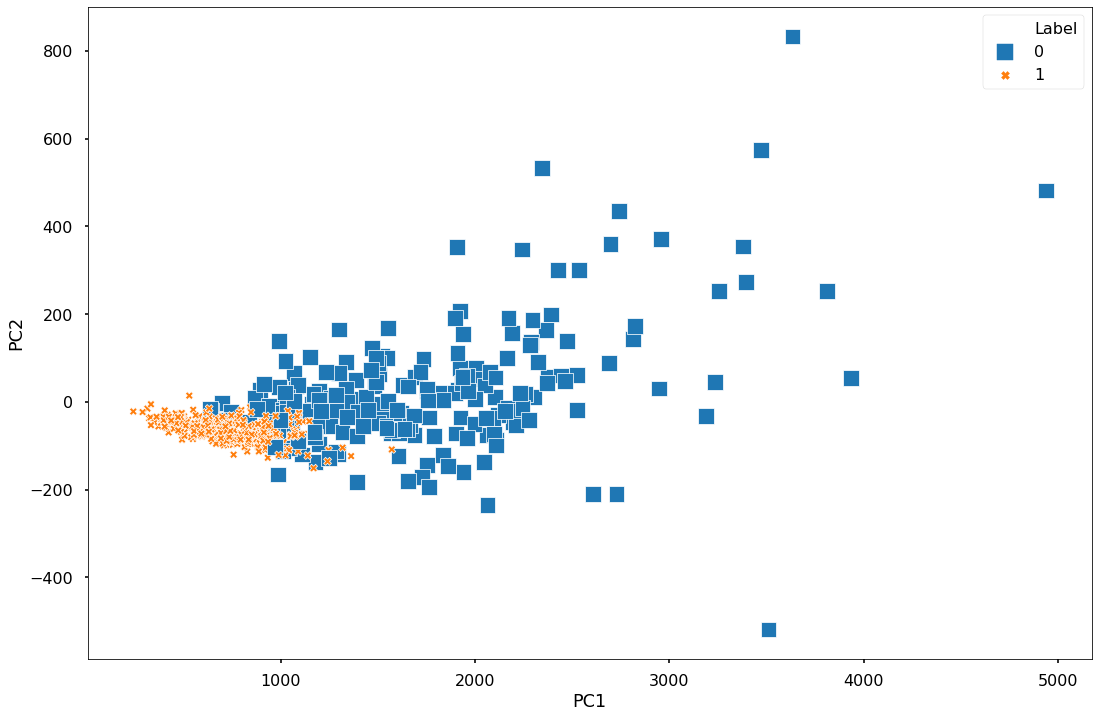

In [258]:
markers = {0: "s", 1: "X"}
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(18,12))
    sns.scatterplot(data=cancer_transf,x='PC1',y='PC2',hue='Label',size=cancer_transf['Label']*1,
                    style='Label',
                    markers=markers)

### **Positive patients are very tightly packed and yes there is some overlapping of both types of patients. One thing thats striking in my mind here is the close approximity of postive cases.**

#### **One more close look...**

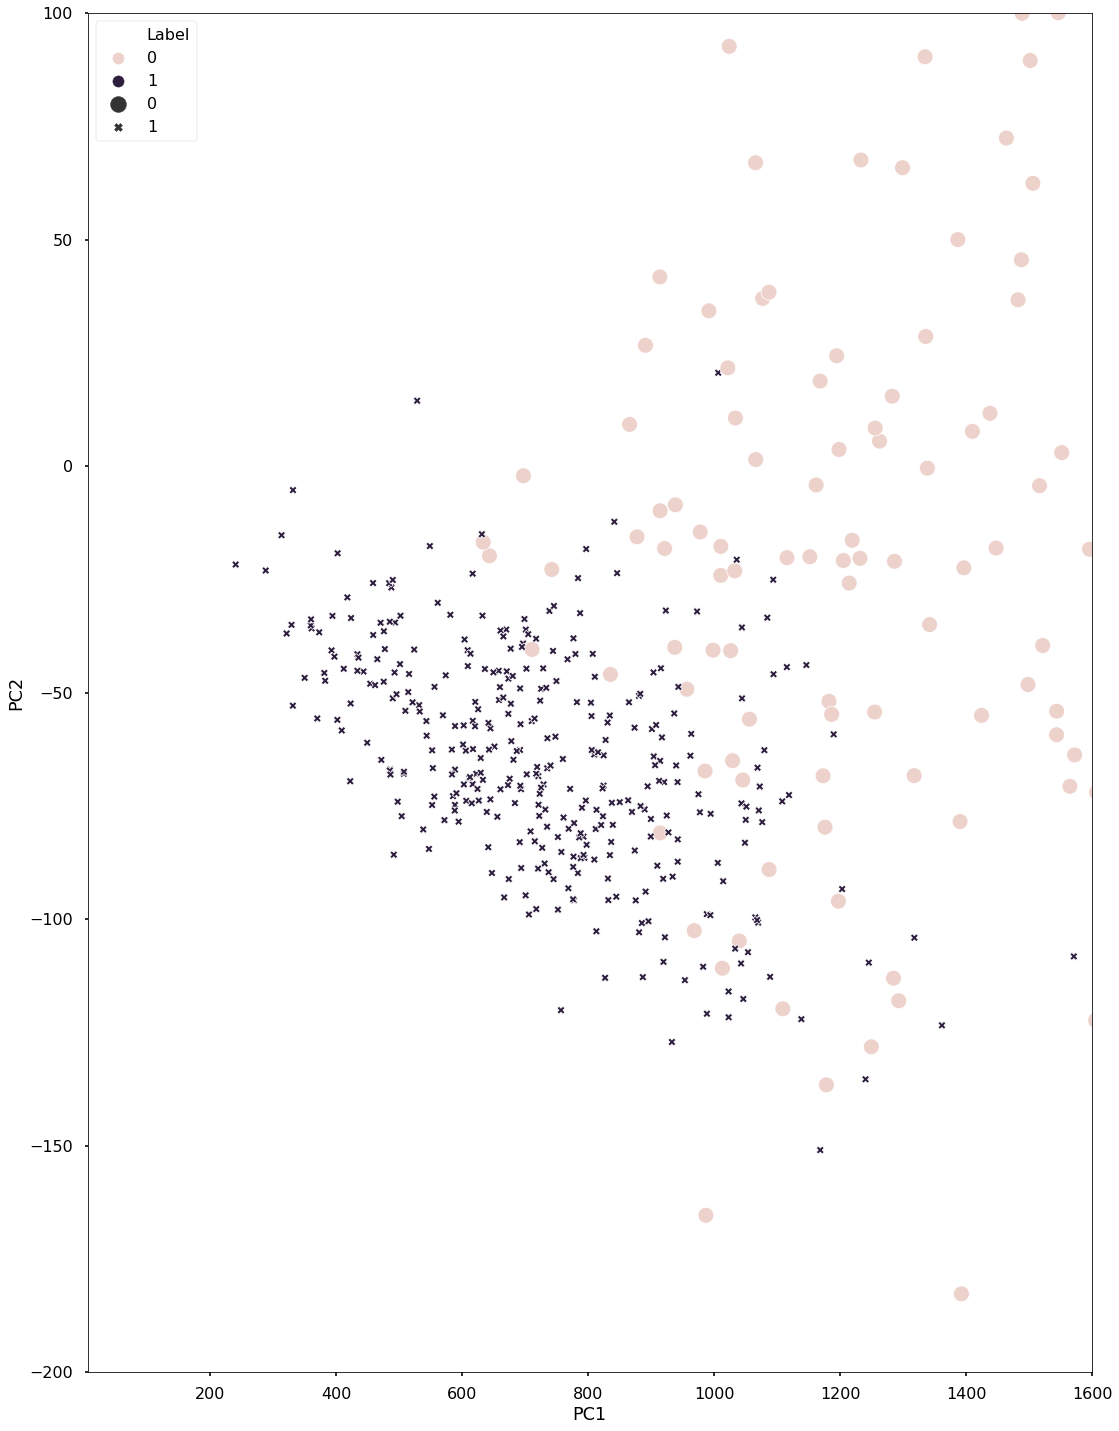

In [275]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(18,25))
    sns.scatterplot(data=cancer_transf,x='PC1',y='PC2',hue='Label',size=cancer_transf['Label']*1,style='Label',hue_norm=(0,1))
    plt.xlim(right=1600)
    plt.ylim(bottom=-200,top=100)

## **``Models_Performance``**
#### **``Lets run some models``**

In [337]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [319]:
X_train,X_test,y_train,y_test = train_test_split(cancer_transf[['PC1','PC2']],cancer_transf['Label'],test_size=0.30,random_state=41)

In [320]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((398, 2), (398,), (171, 2), (171,))

### **``Perceptron``**

In [321]:
pc = Perceptron()

In [322]:
pc_model = pc.fit(X_train,y_train)

In [323]:
pc_y_pred = pc_model.predict(X_test)

In [324]:
accuracy_score(y_test,pc_y_pred)

0.8713450292397661

In [325]:
precision_score(y_test,pc_y_pred)

0.8859649122807017

In [326]:
recall_score(y_test,pc_y_pred)

0.9181818181818182

In [327]:
cross_val_score(pc_model,X_test,y_test,cv=10)

array([0.66666667, 0.70588235, 0.88235294, 0.58823529, 0.82352941,
       0.82352941, 0.82352941, 0.82352941, 0.35294118, 0.94117647])

In [328]:
np.mean(cross_val_score(pc_model,X_test,y_test,cv=10))

0.7431372549019607

### **``Logistic_Regression``**

In [329]:
lr = LogisticRegression()

In [330]:
lr_model = lr.fit(X_train,y_train)

In [331]:
lr_y_pred = lr_model.predict(X_test)

In [332]:
accuracy_score(y_test,lr_y_pred)

0.9298245614035088

In [333]:
precision_score(y_test,lr_y_pred)

0.9375

In [334]:
recall_score(y_test,lr_y_pred)

0.9545454545454546

In [335]:
cross_val_score(lr_model,X_test,y_test,cv=10)

array([0.88888889, 0.94117647, 1.        , 0.82352941, 0.94117647,
       0.94117647, 0.94117647, 0.88235294, 0.94117647, 0.82352941])

In [336]:
np.mean(cross_val_score(lr_model,X_test,y_test,cv=10))

0.9124183006535949

### **``KNN``**

In [339]:
KNN = knn(n_neighbors=7)

In [344]:
knn_model = KNN.fit(X=X_train,y=y_train)

In [345]:
knn_y_pred = knn_model.predict(X_test)

In [346]:
accuracy_score(y_test,knn_y_pred)

0.9473684210526315

In [347]:
precision_score(y_test,knn_y_pred)

0.954954954954955

In [348]:
recall_score(y_test,knn_y_pred)

0.9636363636363636

In [349]:
cross_val_score(knn_model,X_test,y_test,cv=10)

array([0.88888889, 0.88235294, 1.        , 0.94117647, 0.94117647,
       0.94117647, 0.94117647, 0.94117647, 0.88235294, 0.88235294])

In [350]:
np.mean(cross_val_score(knn_model,X_test,y_test,cv=10))

0.9241830065359478

### **Reference Links**

https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/

https://www.analyticsvidhya.com/blog/2019/08/5-applications-singular-value-decomposition-svd-data-science/

https://www.youtube.com/watch?v=46Hpy4FiGls&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=10